In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# chargement des donnees 
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# taille de l'image
M = 28
N = 28
channel = 1
nombre_train = train_images.shape[0]
nombre_test = test_images.shape[0]
print(nombre_train)
print(nombre_test)

60000
10000


In [3]:
# Normalisation
train_images, test_images = train_images / 255.0, test_images / 255.0  

# Re-dimension
trainX = train_images.reshape((nombre_train, M, N, channel))
testX = test_images.reshape((nombre_test, M, N, channel))

trainX = trainX.reshape(nombre_train, channel*M*N)
testX = testX.reshape(nombre_test, channel*M*N)

In [4]:
# L'architecture
model = models.Sequential()
# Couche d'entree
model.add(layers.Dense(64, activation='relu', input_dim=M*N*channel))
# Couche cachee suivante
model.add(layers.Dense(256, activation='relu', input_dim=64))
# Couche cachee suivante
model.add(layers.Dense(64, activation='relu', input_dim=256))
# Couche de sortie
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 83978 (328.04 KB)
Trainable params: 83978 (328.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
print("[INFO] training model...")
history = model.fit(trainX, train_labels, validation_data=(testX, test_labels), batch_size=64, epochs=30)

[INFO] training model...
Epoch 1/30


C:\Users\Phuoc Le\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 2s 2ms/step - loss: 0.4910 - accuracy: 0.8548 - val_loss: 0.2432 - val_accuracy: 0.9277
Epoch 2/30
938/938 [==============================] - 2s 2ms/step - loss: 0.2059 - accuracy: 0.9390 - val_loss: 0.1595 - val_accuracy: 0.9511
Epoch 3/30
938/938 [==============================] - 2s 2ms/step - loss: 0.1498 - accuracy: 0.9550 - val_loss: 0.1227 - val_accuracy: 0.9619
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: 0.1197 - accuracy: 0.9638 - val_loss: 0.1176 - val_accuracy: 0.9634
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0998 - accuracy: 0.9704 - val_loss: 0.0988 - val_accuracy: 0.9700
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0865 - accuracy: 0.9740 - val_loss: 0.0913 - val_accuracy: 0.9745
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0733 - accuracy: 0.9782 - val_loss: 0.0903 - val_accuracy: 0.9718
Epoch 8/30
938/93

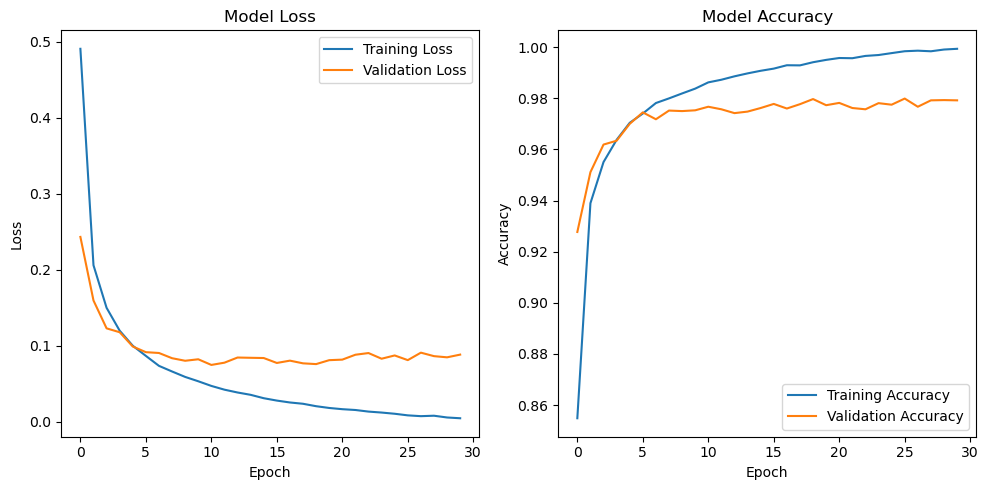

In [26]:
# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss on the first subplot
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')

# Plot accuracy on the second subplot
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(testX, test_labels, verbose=2)

313/313 - 0s - loss: 0.0881 - accuracy: 0.9792 - 306ms/epoch - 978us/step
